In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data/Cleaned Data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
X = df.drop('Survived', axis=1)
y = df[['Survived']]

X = X.iloc[:, :].values
y = y.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
model = SVC()

In [4]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
model.score(X_train, y_train)

0.8398876404494382

In [6]:
y_pred = model.predict(X_test)

In [8]:
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [20, 54]])

[<matplotlib.text.Text at 0x11c78d198>, <matplotlib.text.Text at 0x11c74b7f0>]

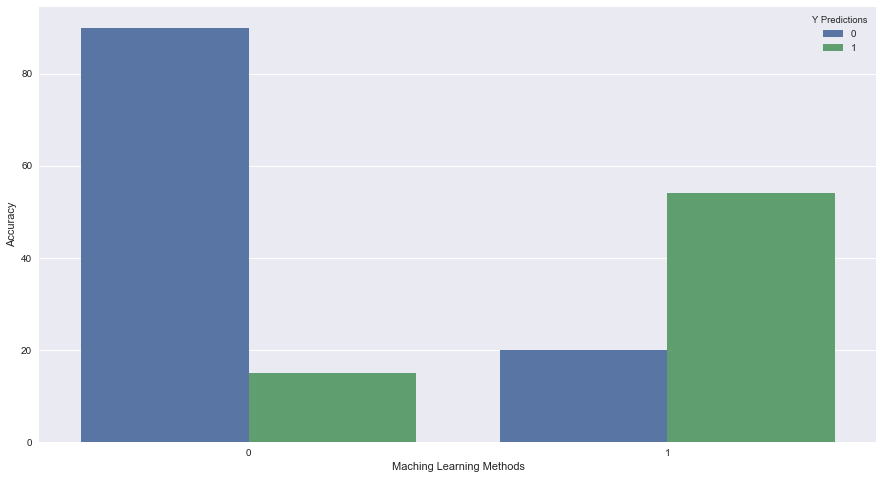

In [9]:
results = pd.DataFrame()
results['Y Test'] = y_test
results['Y Predictions'] = y_pred

fig = plt.figure(figsize=(15,8))
fig = sns.countplot(x=results['Y Test'], hue=results['Y Predictions'])
fig.set(ylabel="Accuracy", xlabel="Maching Learning Methods")